<a href="https://colab.research.google.com/github/darshan1328/ML-for-Predictive-Lead-Scoring/blob/main/Predictive_Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("train.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,blue-collar,single,high.school,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,40,admin.,married,high.school,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
2,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
3,37,blue-collar,married,high.school,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
4,54,housemaid,married,university.degree,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,35,admin.,married,unknown,unknown,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32946,34,blue-collar,married,unknown,no,no,yes,cellular,jul,tue,...,13,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
32947,58,admin.,married,university.degree,no,no,no,telephone,aug,fri,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no
32948,50,services,divorced,basic.4y,unknown,yes,yes,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

def preprocess_data(df):

    # Create a copy to avoid modifying original data
    data = df.copy()

    # Handle missing values if any
    data = data.replace('unknown', np.nan)

    # Separate features and target
    X = data.drop('y', axis=1)
    y = data['y']

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=np.number).columns

    # Create preprocessing pipelines for numerical and categorical features
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a column transformer to apply different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)])

    # Apply preprocessing
    X_processed = preprocessor.fit_transform(X)

    # Encode the target variable
    label_encoder_y = LabelEncoder()
    y_encoded = label_encoder_y.fit_transform(y)


    return X_processed, y_encoded, preprocessor, label_encoder_y

preprocessed_data = preprocess_data(df)
X, Y, preprocessor, label_encoder_y = preprocessed_data

In [ ]:
no_of_instances = len(X)
no_of_conversions = len(Y[Y==1])
conversion_rate = no_of_conversions/no_of_instances

print(f"Number of instances: {no_of_instances}")
print(f"Number of conversions: {no_of_conversions}")
print(f"Conversion_rate: {conversion_rate}")

Number of instances: 32950
Number of conversions: 3712
Conversion_rate: 0.11265553869499241


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


Naive Bayes Model

In [ ]:
def naive_bayes_model(X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  params_grid = {
      'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
  }

  nb = GaussianNB()
  grid_search = GridSearchCV(estimator=nb, param_grid=params_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
  grid_search.fit(X_train, Y_train)

  print(f"Best parameters: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

  best_nb_model = grid_search.best_estimator_
  y_pred = best_nb_model.predict(X_test)

  accuracy = accuracy_score(Y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")

  report = classification_report(Y_test, y_pred)
  print("Classification Report:\n", report)

naive_bayes_model(X, Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'var_smoothing': 1.0}
Best cross-validation score: 0.8915
Accuracy: 0.8961
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5836
           1       0.58      0.34      0.43       754

    accuracy                           0.90      6590
   macro avg       0.75      0.66      0.69      6590
weighted avg       0.88      0.90      0.88      6590



Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree_model(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    params_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'criterion': ['gini'],
    'max_features': ['sqrt', None]
}



    tree = DecisionTreeClassifier()
    grid_search = GridSearchCV(estimator=tree, param_grid=params_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

    grid_search.fit(X_train, Y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    best_dt_model = grid_search.best_estimator_
    y_pred = best_dt_model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:\n", report)

    return best_dt_model
decision_tree_model(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.9131
Accuracy: 0.9152
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5836
           1       0.65      0.56      0.60       754

    accuracy                           0.92      6590
   macro avg       0.80      0.76      0.78      6590
weighted avg       0.91      0.92      0.91      6590



DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression_model(X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  params_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'max_iter': [1000]
  }
  lr = LogisticRegression()
  grid_search = GridSearchCV(estimator=lr, param_grid=params_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

  grid_search.fit(X_train, Y_train)

  print(f"Best parameters: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

  best_lr_model = grid_search.best_estimator_
  y_pred = best_lr_model.predict(X_test)

  accuracy = accuracy_score(Y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")

  report = classification_report(Y_test, y_pred)
  print("Classification Report:\n", report)
  no_of_instances = len(X_test)
  no_of_conversions = len(y_pred[y_pred==1])
  conversion_rate = no_of_conversions/no_of_instances

  print(f"Number of instances: {no_of_instances}")
  print(f"Number of conversions: {no_of_conversions}")
  print(f"Conversion_rate: {conversion_rate}")
logistic_regression_model(X, Y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9093
Accuracy: 0.9146
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5836
           1       0.70      0.45      0.55       754

    accuracy                           0.91      6590
   macro avg       0.81      0.71      0.75      6590
weighted avg       0.90      0.91      0.91      6590

Number of instances: 6590
Number of conversions: 485
Conversion_rate: 0.07359635811836115


Neural Network model

In [ ]:
from sklearn.neural_network import MLPClassifier
def neural_network_model(X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  params_grid = {
      'hidden_layer_sizes': [(36,), (36,18), (50)],
      'activation': ['relu', 'tanh'],
      'solver': ['adam'],
  }
  nn = MLPClassifier()
  grid_search = GridSearchCV(estimator=nn, param_grid=params_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

  grid_search.fit(X_train, Y_train)

  print(f"Best parameters: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

  best_nn_model = grid_search.best_estimator_
  y_pred = best_nn_model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")

  report = classification_report(Y_test, y_pred)
  print("Classification Report:\n", report)

neural_network_model(X, Y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 50, 'solver': 'adam'}
Best cross-validation score: 0.9055
Accuracy: 0.9053
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      5836
           1       0.59      0.56      0.58       754

    accuracy                           0.91      6590
   macro avg       0.77      0.76      0.76      6590
weighted avg       0.90      0.91      0.90      6590



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Analyzing Decision Tree Model Performance...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.9131
Accuracy: 0.9152
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5836
           1       0.65      0.56      0.60       754

    accuracy                           0.92      6590
   macro avg       0.80      0.76      0.78      6590
weighted avg       0.91      0.92      0.91      6590

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.9131
Accuracy: 0.9152
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      

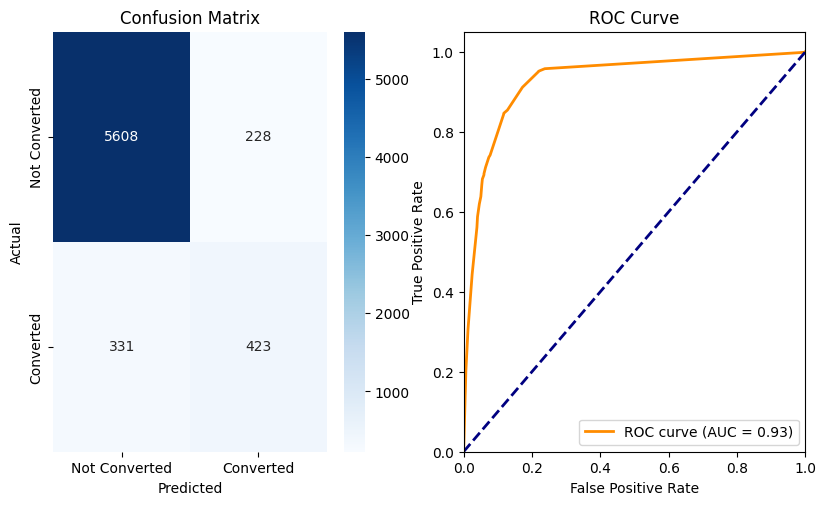

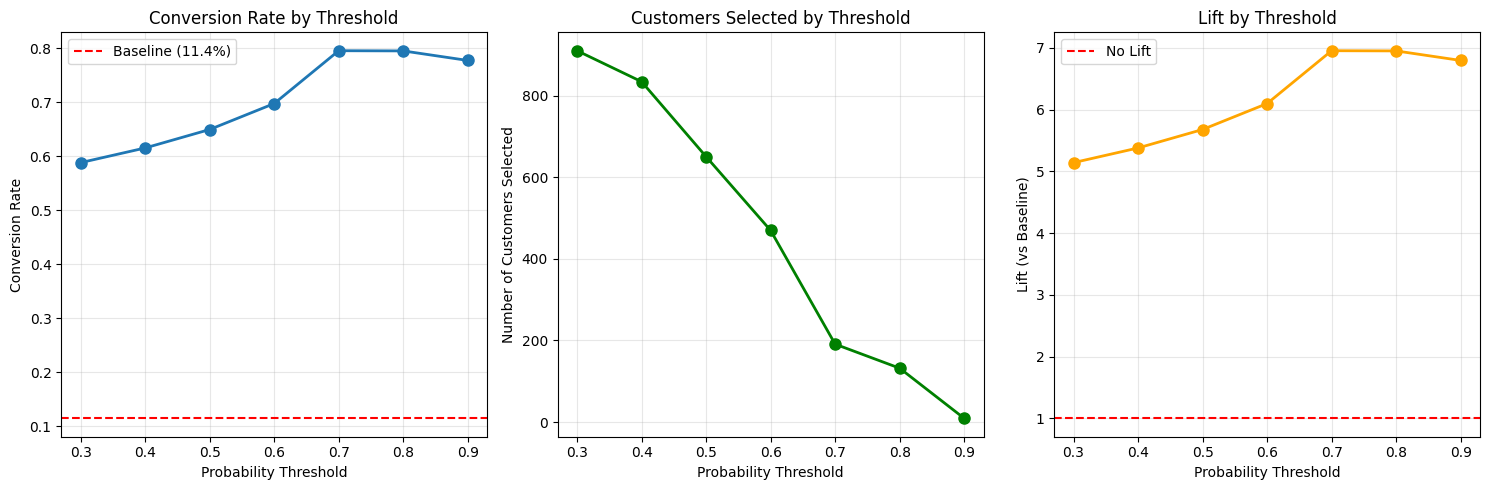

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd

def analyze_decision_tree_performance(model, X_test, Y_test, X_train, Y_train, feature_names=None):
    """
    Comprehensive analysis of Decision Tree model performance
    """

    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # 1. CONFUSION MATRIX
    plt.figure(figsize=(15, 12))

    plt.subplot(2, 3, 1)
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # 2. ROC CURVE
    plt.subplot(2, 3, 2)
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    return y_pred_proba

def customer_selection_analysis(model, X_test, Y_test, y_pred_proba):
    """
    Analyze how selecting customers based on predicted probability affects conversion rate
    """

    # Create DataFrame for analysis
    results_df = pd.DataFrame({
        'actual_conversion': Y_test,
        'predicted_probability': y_pred_proba
    })

    # Calculate baseline conversion rate
    baseline_conversion_rate = Y_test.mean()

    print("="*60)
    print("CUSTOMER SELECTION ANALYSIS")
    print("="*60)
    print(f"Baseline Conversion Rate: {baseline_conversion_rate:.2%}")
    print(f"Total Customers: {len(Y_test)}")
    print()

    # Analyze different selection strategies
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    analysis_results = []

    for threshold in thresholds:
        # Select customers above threshold
        selected_customers = results_df[results_df['predicted_probability'] >= threshold]

        if len(selected_customers) > 0:
            selected_conversion_rate = selected_customers['actual_conversion'].mean()
            num_selected = len(selected_customers)
            percentage_selected = (num_selected / len(Y_test)) * 100

            # Calculate lift
            lift = selected_conversion_rate / baseline_conversion_rate

            analysis_results.append({
                'threshold': threshold,
                'customers_selected': num_selected,
                'percentage_selected': percentage_selected,
                'conversion_rate': selected_conversion_rate,
                'lift': lift,
                'improvement': (selected_conversion_rate - baseline_conversion_rate) * 100
            })

    # Display results
    results_table = pd.DataFrame(analysis_results)
    print("THRESHOLD ANALYSIS:")
    print("-" * 80)
    print(f"{'Threshold':<10} {'Selected':<10} {'% Selected':<12} {'Conv Rate':<12} {'Lift':<8} {'Improvement':<12}")
    print("-" * 80)

    for _, row in results_table.iterrows():
        print(f"{row['threshold']:<10.1f} {row['customers_selected']:<10.0f} {row['percentage_selected']:<12.1f}% {row['conversion_rate']:<12.1%} {row['lift']:<8.1f}x {row['improvement']:<12.1f}pp")

    # Visualization
    plt.figure(figsize=(15, 5))

    # Plot 1: Conversion Rate vs Threshold
    plt.subplot(1, 3, 1)
    plt.plot(results_table['threshold'], results_table['conversion_rate'], 'o-', linewidth=2, markersize=8)
    plt.axhline(y=baseline_conversion_rate, color='red', linestyle='--', label=f'Baseline ({baseline_conversion_rate:.1%})')
    plt.xlabel('Probability Threshold')
    plt.ylabel('Conversion Rate')
    plt.title('Conversion Rate by Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Number of Customers vs Threshold
    plt.subplot(1, 3, 2)
    plt.plot(results_table['threshold'], results_table['customers_selected'], 'o-', linewidth=2, markersize=8, color='green')
    plt.xlabel('Probability Threshold')
    plt.ylabel('Number of Customers Selected')
    plt.title('Customers Selected by Threshold')
    plt.grid(True, alpha=0.3)

    # Plot 3: Lift vs Threshold
    plt.subplot(1, 3, 3)
    plt.plot(results_table['threshold'], results_table['lift'], 'o-', linewidth=2, markersize=8, color='orange')
    plt.axhline(y=1, color='red', linestyle='--', label='No Lift')
    plt.xlabel('Probability Threshold')
    plt.ylabel('Lift (vs Baseline)')
    plt.title('Lift by Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results_table


# Usage with your trained model:
# Assuming you have X_test, Y_test, and your trained model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 1. Analyze model performance
print("Analyzing Decision Tree Model Performance...")
y_pred_proba = analyze_decision_tree_performance(decision_tree_model(X, Y), X_test, Y_test, X_train, Y_train)

# 2. Customer selection analysis
results_table = customer_selection_analysis(decision_tree_model(X, Y), X_test, Y_test, y_pred_proba)



In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def analyze_decision_tree_performance(model, X_test, Y_test, X_train, Y_train, feature_names=None):
    """
    Extended to save ROC Curve data to CSV.
    """
    import os

    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Save to CSV
    roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})
    roc_df['AUC'] = roc_auc
    roc_df.to_csv('roc_data.csv', index=False)

    # Plot (optional, for visual analysis)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("roc_curve_plot.png")  # Save plot (optional for Power BI visuals)
    plt.close()

    return y_pred_proba

def customer_selection_analysis(model, X_test, Y_test, y_pred_proba):
    """
    Extended to save threshold analysis data to CSV.
    """
    results_df = pd.DataFrame({
        'actual_conversion': Y_test,
        'predicted_probability': y_pred_proba
    })

    baseline_conversion_rate = Y_test.mean()
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    analysis_results = []

    for threshold in thresholds:
        selected_customers = results_df[results_df['predicted_probability'] >= threshold]

        if len(selected_customers) > 0:
            selected_conversion_rate = selected_customers['actual_conversion'].mean()
            num_selected = len(selected_customers)
            percentage_selected = (num_selected / len(Y_test)) * 100
            lift = selected_conversion_rate / baseline_conversion_rate

            analysis_results.append({
                'threshold': threshold,
                'customers_selected': num_selected,
                'percentage_selected': percentage_selected,
                'conversion_rate': selected_conversion_rate,
                'lift': lift,
                'improvement_pp': (selected_conversion_rate - baseline_conversion_rate) * 100
            })

    # Save to CSV
    results_table = pd.DataFrame(analysis_results)
    results_table.to_csv('threshold_analysis.csv', index=False)

    # Optional visualization code here...

    return results_table


# Assuming you have X_test, Y_test, and your trained model from previous steps
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Assuming decision_tree_model function is defined and returns a trained model
best_dt_model = decision_tree_model(X, Y)

# 1. Analyze model performance and get probabilities
y_pred_proba = analyze_decision_tree_performance(best_dt_model, X_test, Y_test, X_train, Y_train)

# 2. Customer selection analysis and save to CSV
results_table = customer_selection_analysis(best_dt_model, X_test, Y_test, y_pred_proba)

# Download the generated CSV files
files.download('roc_data.csv')
files.download('threshold_analysis.csv')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.9131
Accuracy: 0.9152
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5836
           1       0.65      0.56      0.60       754

    accuracy                           0.92      6590
   macro avg       0.80      0.76      0.78      6590
weighted avg       0.91      0.92      0.91      6590



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>